In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_targets=1,noise=5,random_state=42)

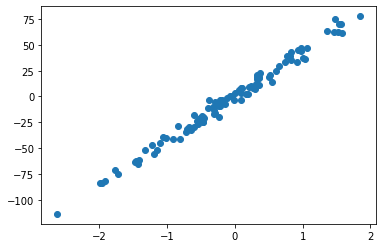

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

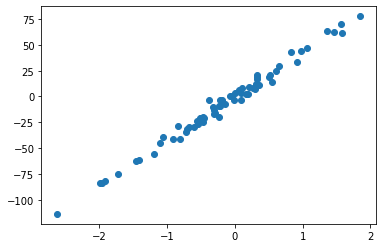

In [6]:
plt.scatter(X_train,y_train)
plt.show()

In [7]:
model=LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_,model.intercept_

(array([42.84588804]), -0.26194113093984495)

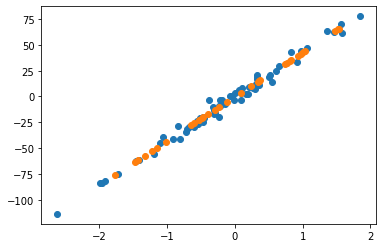

In [10]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,model.predict(X_test))

In [11]:
class LinearRegCustom:
    
    def __init__(self, lr=.01, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
        
        
    def fit(self, X, y):
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errs = []
        for i in range(self.max_iters):
            self.gradient_decend(X, y)
            errs.append(self.error(X, y))
        
        return errs
            
    
    def gradient_decend(self, X, y):
        delta_coef, delta_inter = self.gradient(X, y)
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        
        de2m = np.mean(e * X)
        de2c = np.mean(e * 1)
        
        return -de2m*self.lr, -de2c*self.lr
    
    def error(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        return np.mean(e**2)
        
    
    def predict(self, X):
        return self.coef_ * X + self.intercept_
            
        

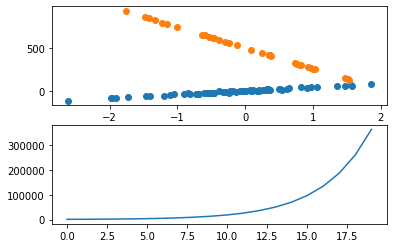

In [12]:
m2 = LinearRegCustom(lr=2)

errors = m2.fit(X_train, y_train)

plt.figure()
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train)
plt.scatter(X_test, m2.predict(X_test))
plt.subplot(2, 1, 2)
plt.plot(errors)
plt.show()

In [13]:
# m2=LinearRegCustom(lr=1)

# errors = m2.fit(X_train, y_train)

# plt.figure()
# plt.subplot(2, 1, 1)
# plt.scatter(X_train, y_train)
# plt.scatter(X_test, m2.predict(X_test))
# plt.subplot(2, 1, 2)
# plt.plot(errors)
# plt.show()

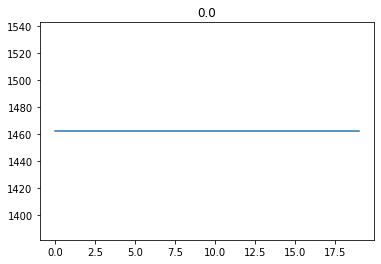

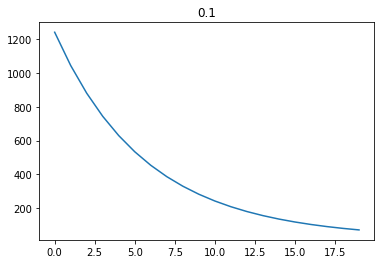

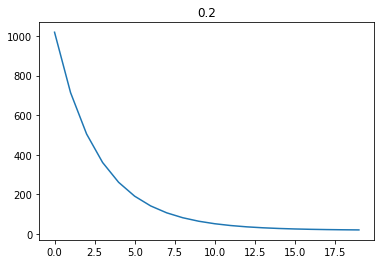

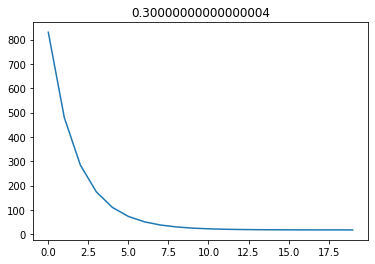

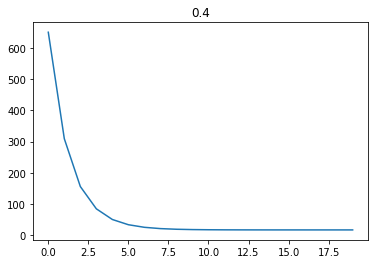

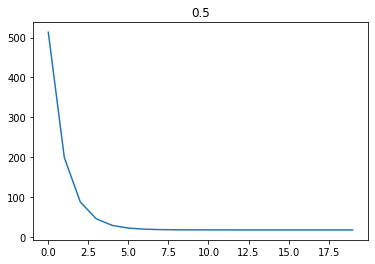

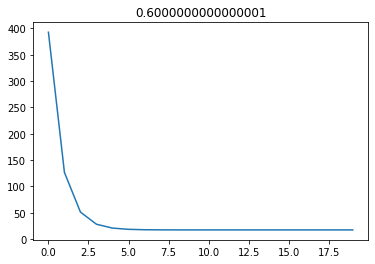

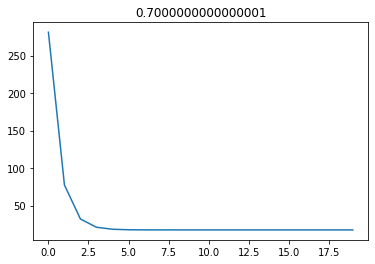

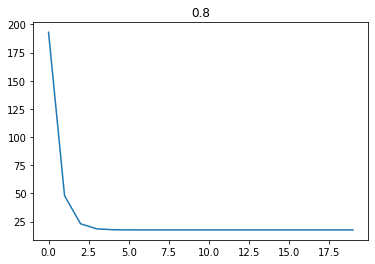

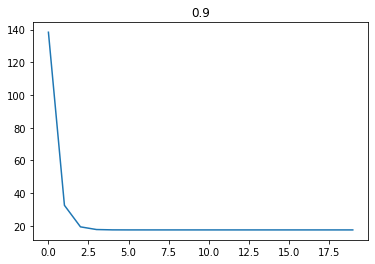

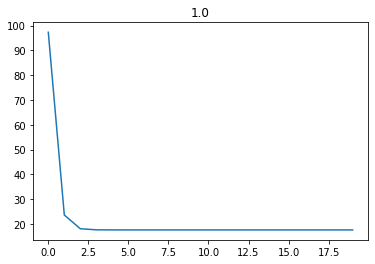

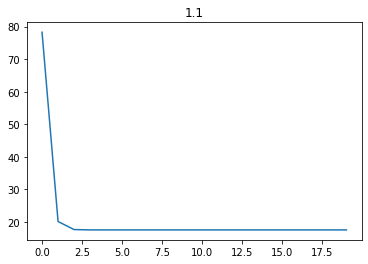

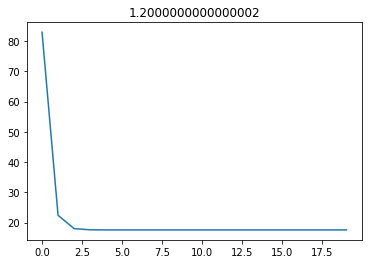

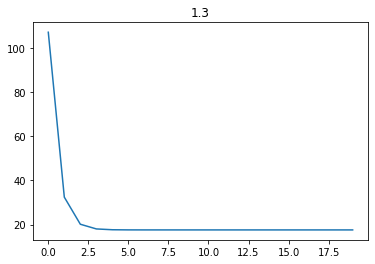

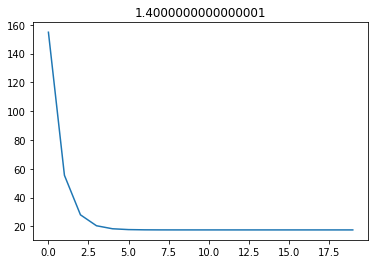

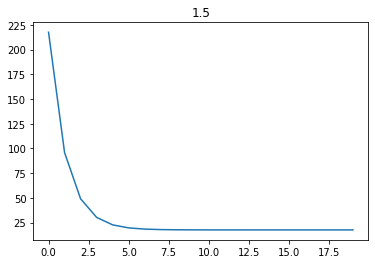

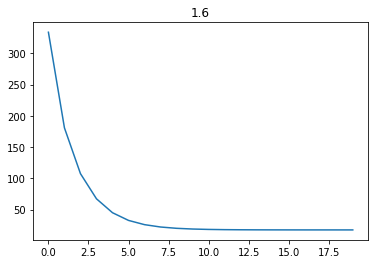

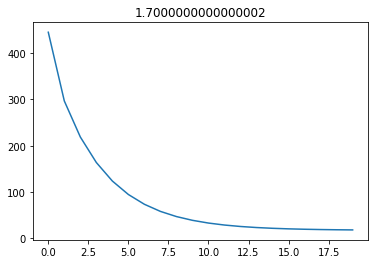

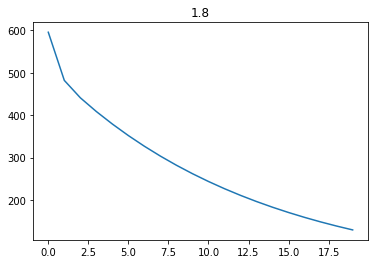

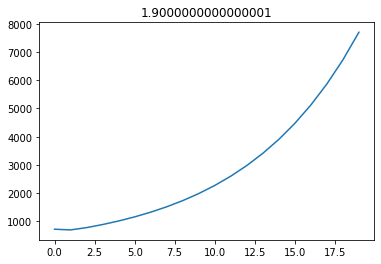

In [14]:
for i in  range(20):
    lr=0.1*i
    m2=LinearRegCustom(lr=lr)
    errors=m2.fit(X_train,y_train)
    plt.figure()
    plt.title(str(lr))
    plt.plot(errors)
    plt.show()

In [16]:
class LinearRegssion():
    
    def fit(self,X,y):
        X=np.hstack([np.ones((X.shape[0],1)),X])
        y=y.reshape(-1,1)
        
        first=np.linalg.inv(np.dot(X.T,X))
        second=np.dot(X.T,y)
        
        self.theta=np.dot(first,second)
        
    def predict(self,X):
        X=np.hstack([np.ones((X.shape[0],1)),X])
        return np.dot(X,self.theta_)
        